In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 런타임 재시작(한글 폰트 깨짐 방지)

In [ ]:
%cd /content/drive/MyDrive/금융데이터 공모전

/content/drive/MyDrive/금융데이터 공모전


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install graphviz

In [ ]:
!pip install shap

# 데이터전처리

###**I. 엑셀을 통해 사전 전처리**
1. 온라인 쇼핑 품목 데이터(BC카드)와 서울시 금융자산 데이터(신한은행)를 병합하기 위해 공통의 피쳐를 만드는 작업을 했다. 

2. 공통의 피쳐는 기준년월, 성별, 연령, 법정동이다. 온라인 쇼핑품목 데이터는 공통의 피쳐를 기준으로 각각의 품목(품목중분류명)의 매출건수, 매출총액을 합계로 나타냈다. 예를 들어 ‘‘o2o서비스 매출건수’, ‘o2o서비스 매출품목’등으로 나타냈다. 서울시 금융자산 데이터는 별다른 변형 과정 없이 병합을 시도했다.

3. 병합 과정에서는 ‘inner join’방법을 사용했으며, 데이터가 중복되었는지 여부를 확인했다. 

### **II. 미리 병합한 데이터를 가지고 1인당 값을 의미하는 데이터로 바꿔주었다.**

1. BC카드 데이터와 신한은행 데이터를 <성별, 연령, 법정동> 기준으로 조인하여 Sum한 값들을 인구수로 나누어주어서 1인당 값을 의미하는 데이터로 바꾸고자 한다. 

2. 신한은행 데이터는 이미 개별로 수집된 데이터 이기 때문에 해당 값/수집된 값으로 계산할 것이며 BC카드는 서울시 인구수 데이터를 이용해서 값으로 나눌 것이다. 

EX) BC카드 데이터 : 디지털매출건수 / 특정조건의 서울시 인구수 >>> 조인은 <성별, 연령, 법정동>을 기준으로 조인 할 것이다.

신한은행 데이터 : 총수신금액 / 계산된 n값


## 1. BC카드 데이터 1인당 값으로 전처리

### (1)인구수에 대한 데이터 전처리

In [ ]:
refined_data= pd.read_csv("refined_data.csv").drop(columns='Unnamed: 0')
refined_data

,기준년월,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n
0,1,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,...,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0,345
1,1,가락동,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,...,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0,411
2,1,가락동,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,...,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0,369
3,1,가락동,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,...,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0,363
4,1,가락동,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,흥인동,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0,4
14468,5,흥인동,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,...,334677,0,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0,4
14469,5,흥인동,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,...,0,0,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0,6
14470,5,흥인동,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0,4


In [ ]:
#3개 데이터 모두 서울 뿐만 아니라 전국에 대한 수집 값
df1=pd.read_excel("법정동to행정동치환 자료.xlsx")
df2=pd.read_csv("인구수비중남자.csv", encoding="cp949")
df3=pd.read_csv('인구수비중여자.csv', encoding="cp949")

In [ ]:
df1=df1[['행정동코드', '법정동코드', '법정동']]

In [ ]:
df1

,행정동코드,법정동코드,법정동
0,11000000,11000000.0,서울특별시
1,11110000,11110000.0,종로구
2,11110515,11110101.0,청운동
3,11110515,11110102.0,신교동
4,11110515,11110103.0,궁정동
...,...,...,...
21734,50130610,50130114.0,대포동
21735,50130610,50130118.0,하원동
21736,50130620,50130119.0,색달동
21737,50130620,50130120.0,상예동


In [ ]:
df2.head()

,행정동코드,성별,연령,인구수
0,11000000,1,20,707669
1,11000000,1,30,737901
2,11000000,1,40,756950
3,11000000,1,50,748582
4,11000000,1,60,1016049


In [ ]:
df3

,행정동코드,성별,연령,인구수
0,11000000,0,20,752742
1,11000000,0,30,737205
2,11000000,0,40,771232
3,11000000,0,50,774974
4,11000000,0,60,1210075
...,...,...,...,...
19230,50130620,0,20,239
19231,50130620,0,30,194
19232,50130620,0,40,246
19233,50130620,0,50,306


In [ ]:
join_popboy= pd.merge(left=df2, right=df1, how='left', on='행정동코드',left_index=True)
join_popboy

,행정동코드,성별,연령,인구수,법정동코드,법정동
0.0,11000000,1,20,707669,11000000.0,서울특별시
0.0,11000000,1,30,737901,11000000.0,서울특별시
0.0,11000000,1,40,756950,11000000.0,서울특별시
0.0,11000000,1,50,748582,11000000.0,서울특별시
0.0,11000000,1,60,1016049,11000000.0,서울특별시
...,...,...,...,...,...,...
21737.0,50130620,1,50,383,50130120.0,상예동
21738.0,50130620,1,50,383,50130121.0,하예동
21736.0,50130620,1,60,575,50130119.0,색달동
21737.0,50130620,1,60,575,50130120.0,상예동


행정동이랑 법정동조인할 떄 인구수가 중복되는 것을 제거 해보겠다.(남자데이터로 먼저하고 여자꺼는 중간 과정은 생략)

In [ ]:
### 중복된 값들이 발생함. 왜냐하면 행정동이 더 세분화되 개념인데 그게 반드시 법정코드에 부분집합화 되어 있는 개념은 아니기 때문에 중복값이 발생한다.
### 그래서 이렇게 미스매치 된 값들을 다 제거해보고 진행해 하였다.
join_popboy[join_popboy.duplicated(['행정동코드',	'성별',	'연령',	'인구수'])]

,행정동코드,성별,연령,인구수,법정동코드,법정동
3.0,11110515,1,20,793,11110102.0,신교동
4.0,11110515,1,20,793,11110103.0,궁정동
5.0,11110515,1,20,793,11110104.0,효자동
6.0,11110515,1,20,793,11110105.0,창성동
7.0,11110515,1,20,793,11110108.0,통인동
...,...,...,...,...,...,...
21738.0,50130620,1,40,299,50130121.0,하예동
21737.0,50130620,1,50,383,50130120.0,상예동
21738.0,50130620,1,50,383,50130121.0,하예동
21737.0,50130620,1,60,575,50130120.0,상예동


In [ ]:
###법정동이랑 행정동을 조인할 때 중복된 값들을 다 제거해준 값들이다.
join_popboy_clear=join_popboy.drop_duplicates(subset=['행정동코드',	'성별',	'연령',	'인구수'])
join_popboy_clear

,행정동코드,성별,연령,인구수,법정동코드,법정동
0.0,11000000,1,20,707669,11000000.0,서울특별시
0.0,11000000,1,30,737901,11000000.0,서울특별시
0.0,11000000,1,40,756950,11000000.0,서울특별시
0.0,11000000,1,50,748582,11000000.0,서울특별시
0.0,11000000,1,60,1016049,11000000.0,서울특별시
...,...,...,...,...,...,...
21736.0,50130620,1,20,252,50130119.0,색달동
21736.0,50130620,1,30,249,50130119.0,색달동
21736.0,50130620,1,40,299,50130119.0,색달동
21736.0,50130620,1,50,383,50130119.0,색달동


In [ ]:
###중복값 제거가 잘되었는지 확인>>> 잘되었음을 확인
join_popboy_clear[join_popboy_clear.duplicated(['행정동코드',	'성별',	'연령',	'인구수'])]

,행정동코드,성별,연령,인구수,법정동코드,법정동


In [ ]:
##남자 인구 통계 데이터 프레임
join_popboy_clear=join_popboy_clear[['법정동코드','법정동','성별','연령','인구수']]
join_popboy_clear

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,1,20,707669
0.0,11000000.0,서울특별시,1,30,737901
0.0,11000000.0,서울특별시,1,40,756950
0.0,11000000.0,서울특별시,1,50,748582
0.0,11000000.0,서울특별시,1,60,1016049
...,...,...,...,...,...
21736.0,50130119.0,색달동,1,20,252
21736.0,50130119.0,색달동,1,30,249
21736.0,50130119.0,색달동,1,40,299
21736.0,50130119.0,색달동,1,50,383


In [ ]:
##여자 인구 통계 데이터 프레임
join_popgirl= pd.merge(left=df3, right=df1, how='left', on='행정동코드',left_index=True)
join_popgirl_clear=join_popgirl.drop_duplicates(subset=['행정동코드',	'성별',	'연령',	'인구수'])
join_popgirl_clear=join_popgirl_clear[['법정동코드','법정동','성별','연령','인구수']]
join_popgirl_clear

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,0,20,752742
0.0,11000000.0,서울특별시,0,30,737205
0.0,11000000.0,서울특별시,0,40,771232
0.0,11000000.0,서울특별시,0,50,774974
0.0,11000000.0,서울특별시,0,60,1210075
...,...,...,...,...,...
21736.0,50130119.0,색달동,0,20,239
21736.0,50130119.0,색달동,0,30,194
21736.0,50130119.0,색달동,0,40,246
21736.0,50130119.0,색달동,0,50,306


In [ ]:
##남자,여자 인구수 데이터 하나로 합치기(merge_popul.csv로 송출)
merge_popul=pd.concat([join_popboy_clear,join_popgirl_clear])
merge_popul

# merge_popul.to_csv('merge_popul.csv')

,법정동코드,법정동,성별,연령,인구수
0.0,11000000.0,서울특별시,1,20,707669
0.0,11000000.0,서울특별시,1,30,737901
0.0,11000000.0,서울특별시,1,40,756950
0.0,11000000.0,서울특별시,1,50,748582
0.0,11000000.0,서울특별시,1,60,1016049
...,...,...,...,...,...
21736.0,50130119.0,색달동,0,20,239
21736.0,50130119.0,색달동,0,30,194
21736.0,50130119.0,색달동,0,40,246
21736.0,50130119.0,색달동,0,50,306


### (2)BC카드 1인당 값으로 나누기

'refined_data(수용이가 만든 nfinsumjoin2.csv데이터에서 기준년월을 1,2,3,4로 바꾸고 송출한 것)에는 법정동이 없기 떄문에 내가 그전에 작업한 법정동코드를 이 데이터에 붙여줄 것임. df는 df1에서 읍면동을 제거해준것이기 때문에 어차피 같은 데이터이기여서 그냥 옆으로 병렬로 붙여줘도 상관이 없어서 옆에 열이름을 추가해서 그대로 붙여 주었음 >> 그래서 읍면동이랑 법정동코드를 같이 추출하려고 하는 것임

In [ ]:
df=pd.read_excel('머신러닝을 위한 학습자료(월을 기준으로 합쳐서 숫자화).xlsx')
df1=pd.read_csv('BC card.csv')
df

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,시군구,법정동코드,매출금액,매출건수,예금금액,소비금액,주택대출금액,전세자금대출,인구밀도
0,201903,10,1010,0,40.0,3,구로구,11530109.0,782521,13,NaN,NaN,NaN,NaN,NaN
1,201903,21,2110,0,20.0,2,구로구,11530109.0,963789,29,NaN,NaN,NaN,NaN,NaN
2,201903,19,1913,0,30.0,2,구로구,11530109.0,924309,46,NaN,NaN,NaN,NaN,NaN
3,201903,21,2111,0,30.0,2,구로구,11530109.0,1089360,54,NaN,NaN,NaN,NaN,NaN
4,201903,17,1710,0,30.0,2,구로구,11530109.0,1656740,58,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306117,202103,20,2013,0,30.0,1,영등포구,11560108.0,1411368,7,NaN,NaN,NaN,NaN,NaN
306118,202103,21,2110,1,30.0,1,영등포구,11560108.0,1386040,63,NaN,NaN,NaN,NaN,NaN
306119,202103,11,1113,0,30.0,2,영등포구,11560108.0,390818,7,NaN,NaN,NaN,NaN,NaN
306120,202103,16,1610,1,40.0,3,영등포구,11560108.0,327592,7,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1['법정동코드']=df['법정동코드']
df2=df1[['읍면동','법정동코드']]

In [ ]:
df2[df2.duplicated(['읍면동','법정동코드'])]

,읍면동,법정동코드
1,궁동,11530109.0
2,궁동,11530109.0
3,궁동,11530109.0
4,궁동,11530109.0
6,길동,11740105.0
...,...,...
306117,영등포동7가,11560108.0
306118,영등포동7가,11560108.0
306119,영등포동7가,11560108.0
306120,영등포동7가,11560108.0


In [ ]:
df2=df2.drop_duplicates(subset=['읍면동', '법정동코드'], keep='first')

In [ ]:
df2[df2['법정동코드'].isnull()]  ## 궁정동: 11110103 도럼동:11110116 봉래동2가:11140120

,읍면동,법정동코드
75512,궁정동,NaN
135887,도렴동,NaN
260662,봉래동2가,NaN


In [ ]:
df2.loc[75512,'법정동코드']=11110103
df2.loc[135887,'법정동코드']=11110116
df2.loc[260662,'법정동코드']=111140120

In [ ]:
df2.isnull().sum()

읍면동      0
법정동코드    0
dtype: int64

In [ ]:
df2

,읍면동,법정동코드
0,궁동,11530109.0
5,길동,11740105.0
31,능동,11215102.0
38,목동,11470102.0
89,묵동,11260104.0
...,...,...
172400,광희동1가,11140145.0
175522,적선동,11110107.0
178101,남대문로2가,11140115.0
193585,화동,11110143.0


여기 위에서 까지가 수용이가 만든 데이터프레임에 법정동코드를 붙여주기 위한 이전 작업을 하였고 지금부터는 df2 데이터가 가지고 있는 법정동코드를 refined_data에 조인을 시켜주면서 refined_data가 법정동코드를 가지게 만들 것임. 여기서 법정동이랑 읍면동은 결국 같은 것임

In [ ]:
refined_data_final=pd.merge(left=refined_data, right=df2, how='left', left_on='법정동', right_on='읍면동')
refined_data_final=refined_data_final.drop(columns='읍면동')
refined_data_final['법정동코드'].isnull().sum() ####결측치가 없음을 확인

0

In [ ]:
col1=refined_data_final.columns[1:].to_list()
col2=refined_data_final.columns[:1].to_list()
new_col = col1+col2
refined_data_final = refined_data_final[new_col]

In [ ]:
refined_data_final.to_csv("refined_data_final.csv")

위에서 수용이가 만든 refined_data에서 법정동코드를 부여 했으니깐 이제부터는 원래 하려고 했던 법정동코드 기준으로 인구수를 이 데이터에 조인을 시킬 것임

In [ ]:
##merge_popul에서 법정동을 drop해보자
merge_popul=merge_popul.drop(columns='법정동')

In [ ]:
###중복값 제거를 위한 sum 작업
merge_popul2=merge_popul['인구수'].groupby([merge_popul['법정동코드'], merge_popul['성별'],merge_popul['연령']]).sum()
merge_popul2=pd.DataFrame(merge_popul2)
merge_popul2.to_csv("merge_popul2.csv")
merge_popul2=pd.read_csv("merge_popul2.csv")
merge_popul2

,법정동코드,성별,연령,인구수
0,11000000.0,0,20,752742
1,11000000.0,0,30,737205
2,11000000.0,0,40,771232
3,11000000.0,0,50,774974
4,11000000.0,0,60,1210075
...,...,...,...,...
30455,50130320.0,1,20,696
30456,50130320.0,1,30,543
30457,50130320.0,1,40,1114
30458,50130320.0,1,50,1275


In [ ]:
merge_popul=merge_popul2

정제된 데이터로 조인 실시 >>>아까 행정동 법정동 코드를 조인하면 14472개의 행이 9017로 줄어듦

5000개 정도 데이터 손실 발생>> 만약 평균으로 처리하면 어떨까??

In [ ]:
###left로 조인해서 몇개의 데이터의 손실이 있지만 괜찮다고 생각
refined_Join=pd.merge(left=refined_data_final, right=merge_popul, how='inner', on=['법정동코드','성별','연령'])
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.0,0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0,0,148,3465320.0,735,24542751,14,253987,7,321960,9,394550,17,709821,0,0.0,0,0,16,167389,0,0,0,0,5,343532,22,1418810,0,0,69,7906034,0,0,0,0,5,...,133,7042276.0,7,220268,10,202642,0,0,5,169784,0,0,181,7835122,7,461092.0,0,0,0,0,12,586263,0,0,0,0,0.0,295865250,670979184,1.053546e+09,0.0,0,0.0,0.0,0,0.0,348,11710107.0,2,6114
2,가락동,1,20,4,117000,166,5821534.0,826,23837931,22,426765,4,192886,8,1548210,19,653814,0,0.0,0,0,16,250860,13,15000,0,0,0,0,26,1621602,0,0,71,9230347,0,0,0,0,25,...,65,2338346.0,7,178429,18,294783,0,0,9,363280,5,292214,161,6654031,13,508770.0,0,0,0,0,15,410897,0,0,7802475,0,0.0,250249365,787022433,1.008720e+09,0.0,0,0.0,0.0,0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0,0,188,2131163.0,621,19129142,10,186705,0,0,0,0,0,0,0,0.0,0,0,55,200309,0,0,0,0,0,0,0,0,0,0,62,2493538,0,0,0,0,0,...,89,3425997.0,10,706423,0,0,0,0,10,132909,0,0,201,4529768,0,0.0,0,0,0,0,10,556660,0,0,5945817,0,0.0,322408389,895865343,1.203931e+09,0.0,10012653,0.0,0.0,0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0,0,277,5339361.0,918,22038358,17,467866,10,7254934,9,358298,9,194203,0,0.0,0,0,42,275546,16,29266,0,0,0,0,12,482994,1,1,54,5433812,0,0,0,0,260,...,80,2756718.0,10,308020,14,301540,0,0,0,0,0,0,265,6571712,0,0.0,0,0,0,0,7,138069,0,0,13785915,0,0.0,309987843,958083105,1.061245e+09,0.0,0,0.0,0.0,0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,양평동1가,0,60,0,0,0,0.0,7,157726,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,12326055,53415823,5.116666e+06,0.0,0,0.0,0.0,0,0.0,18,11560125.0,5,1774
9013,양평동3가,1,60,0,0,0,0.0,9,690180,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1789676.0,43818870,289102738,4.958619e+07,0.0,0,0.0,0.0,0,0.0,58,11560127.0,5,1769
9014,영등포동,1,60,0,0,0,0.0,16,2955709,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,7,437660,7,205084,0,0,0,0,0,0,7,130302,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,51612232,307362538,0.000000e+00,0.0,0,0.0,0.0,0,0.0,82,11560101.0,5,5629
9015,청운동,0,60,0,0,0,0.0,12,667273,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1134544.0,14899511,114768586,1.250022e+08,67823111.0,13376461,0.0,0.0,0,0.0,10,11110101.0,5,1683


In [ ]:
##인구수도 결측치가 없음
refined_Join['인구수'].isnull().sum()

0

여기까지가 이제 전체 값에 대한 데이터 정제를 끝난 것! 
하지만 시각화를 원한다면 refined_data.csv를 가지고 그냥 실행하는 것이 나을 것 같음

In [ ]:
# refined_Join=refined_Join.to_csv("refined_Join.csv")

In [ ]:
# refined_data

BC카드 데이터만 먼저 1인당 데이터화 시켜줌

In [ ]:
list_col=refined_Join.columns[3:102].to_list()

In [ ]:
for i in list_col:
  refined_Join[i]=refined_Join[i]/refined_Join['인구수']
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.0,0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0,0,0.0,295865250,670979184,1.053546e+09,0.0,0,0.0,0.0,0,0.0,348,11710107.0,2,6114
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,7802475,0,0.0,250249365,787022433,1.008720e+09,0.0,0,0.0,0.0,0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,5945817,0,0.0,322408389,895865343,1.203931e+09,0.0,10012653,0.0,0.0,0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,13785915,0,0.0,309987843,958083105,1.061245e+09,0.0,0,0.0,0.0,0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,양평동1가,0,6

지금부터는 신한은행데이터를 1인당 데이터화 시켜줌

In [ ]:
list_col2=refined_Join.columns[103:114].to_list()
list_col2

['급여입금',
 '가맹점매출입금',
 '연금입금',
 '총소비금액',
 '총수신금액',
 '예적금금액',
 '신탁금액',
 '수익증권금액',
 '신용대출금액',
 '담보대출금액',
 '주택대출금액']

In [ ]:
for i in list_col2:
  refined_Join[i]=refined_Join[i]/refined_Join['n']
refined_Join

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,n,법정동코드,기준년월,인구수
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,345,11710107.0,1,6114
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.000000,8.501875e+05,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,348,11710107.0,2,6114
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.000000,6.893922e+05,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,363,11710107.0,3,6114
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.000000,8.597557e+05,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,375,11710107.0,4,6114
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.000000,8.400755e+05,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,369,11710107.0,5,6114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
##인구수값에 null이 나오지 않기 때문에 clear하다는 것을 알 수 있음.
refined_Join[refined_Join['인구수'].isna()].shape

(0, 119)

In [ ]:
###우리가 했던것 1인화된 값으로 바뀐 정제된 데이터 송출
refined_Join.to_csv("refined_Join_per person.csv")

# 2.Data Scaling

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])
df.head(5)

,법정동,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,가락동,1,20,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.0,800819.426087,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,가락동,1,20,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.0,850187.500000,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,가락동,1,20,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.0,689392.190083,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,가락동,1,20,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.0,859755.704000,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,가락동,1,20,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.0,840075.455285,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5


In [ ]:
X = df.iloc[:,3:]
y = df.iloc[:,[1]]
X

,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,모바일상품_매출금액,문화_매출건수,문화_매출금액,...,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,기준년월
0,0.000000,0.000000,0.017010,114.828263,0.068858,2368.782303,0.004089,52.129539,0.000000,0.000000,0.000000,0.000000,0.006869,140.997219,0.0,0.0,0.0,0.0,0.002781,43.640170,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.004089,220.393850,0.000000,0.000000,0.010958,948.474158,0.0,0.0,0.0,0.0,0.002126,44.049231,0.002126,19.454694,...,0.0,0.000000,0.000000,0.012267,427.973667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017010,778.046287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,17546.130435,0.0,0.000000,8.008194e+05,1.848215e+06,2.789248e+06,0.0,0.000,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000,0.024207,566.784429,0.120216,4014.188911,0.002290,41.541871,0.001145,52.659470,0.001472,64.532221,0.002781,116.097645,0.0,0.0,0.0,0.0,0.002617,27.377985,0.000000,0.000000,0.0,0.0,0.000818,56.187766,0.003598,232.059208,0.000000,0.000000,0.011286,1293.103369,0.0,0.0,0.0,0.0,0.000818,13.273307,0.002781,46.412496,...,0.0,0.001636,107.793261,0.021753,1151.827936,0.001145,36.026824,0.001636,33.143932,0.0,0.0,0.000818,27.769709,0.000000,0.000000,0.029604,1281.505070,0.001145,75.415767,0.0,0.0,0.0,0.0,0.001963,95.888616,0.0,0,0.000000,0.0,0.000000,8.501875e+05,1.928101e+06,3.027432e+06,0.0,0.000,0.0,0.0,0.0,0.0,2
2,0.000654,19.136408,0.027151,952.164540,0.135100,3898.909225,0.003598,69.801276,0.000654,31.548250,0.001308,253.223749,0.003108,106.937193,0.0,0.0,0.0,0.0,0.002617,41.030422,0.002126,2.453386,0.0,0.0,0.000000,0.000000,0.004253,265.227674,0.000000,0.000000,0.011613,1509.706739,0.0,0.0,0.0,0.0,0.004089,55.230618,0.000981,48.373242,...,0.0,0.001472,82.424763,0.010631,382.457638,0.001145,29.183677,0.002944,48.214426,0.0,0.0,0.001472,59.417730,0.000818,47.794243,0.026333,1088.326955,0.002126,83.213935,0.0,0.0,0.0,0.0,0.002453,67.205921,0.0,0,21494.421488,0.0,0.000000,6.893922e+05,2.168106e+06,2.778842e+06,0.0,0.000,0.0,0.0,0.0,0.0,3
3,0.000000,0.000000,0.030749,348.570985,0.101570,3128.744194,0.001636,30.537291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008996,32.762349,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010141,407.840693,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.001636,69.506542,0.014557,560.352797,0.001636,115.541871,0.000000,0.000000,0.0,0.0,0.001636,21.738469,0.000000,0.000000,0.032875,740.884527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001636,91.046778,0.0,0,15855.512000,0.0,0.000000,8.597557e+05,2.388974e+06,3.210482e+06,0.0,26700.408,0.0,0.0,0.0,0.0,4
4,0.000000,0.000000,0.045306,873.300785,0.150147,3604.572784,0.002781,76.523716,0.001636,1186.610075,0.001472,58.602879,0.001472,31.763657,0.0,0.0,0.0,0.0,0.006869,45.068041,0.002617,4.786719,0.0,0.0,0.000000,0.000000,0.001963,78.998037,0.000164,0.000164,0.008832,888.749100,0.0,0.0,0.0,0.0,0.042525,427.436539,0.004253,56.444553,...,0.0,0.000818,36.832188,0.013085,450.886163,0.001636,50.379457,0.002290,49.319594,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043343,1074.862938,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001145,22.582434,0.0,0,37360.203252,0.0,0.000000,8.400755e+05,2.596431e+06,2.876002e+06,0.0,0.000,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행
1. Robust scaling, 2. MInMax scailing 3. Standard scailing 세가지 방법을 모두 사용 해보았을 때 성능 측면에서는 차이가 없었다. 하지만 outlier 값을 관리하기에 유리한 robustscaler를 본 분석에서는 사용하고자 한다.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
X_test_s

array([[ 0.00000000e+00,  0.00000000e+00,  5.70406562e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  2.90988415e-02, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 3.20659643e-03,  1.87436074e+03,  8.21854666e-03, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -4.03316685e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  6.51355327e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  8.09552490e-02, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01]])

# 3.머신러닝 분류 예측 모형

**랜덤포레스트와 XGBoost 모델을 둘다 성능 검정을 해보았지만 XGBoost가 계속 더 높은 성능을 보여주어서 XGBoost 위주로 분석을 진행하였다.**

## **(A)랜덤포레스트 방법** 

### (1) 성별예측하기

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 100, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
##scaled 하고 정확도가 더 높아짐!
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       928
           1       0.88      0.91      0.89       876

    accuracy                           0.89      1804
   macro avg       0.89      0.89      0.89      1804
weighted avg       0.89      0.89      0.89      1804



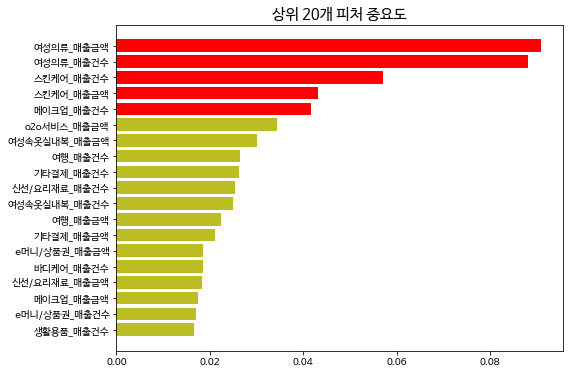

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

### (2) 연령예측하기

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[2]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators= 100, criterion='gini', min_samples_split=2, n_jobs=-1)
baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
##scaled 하고 정확도가 더 높아짐!
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          20       0.89      0.92      0.91       382
          30       0.85      0.76      0.80       365
          40       0.77      0.78      0.77       357
          50       0.74      0.79      0.77       363
          60       0.83      0.83      0.83       337

    accuracy                           0.82      1804
   macro avg       0.82      0.82      0.82      1804
weighted avg       0.82      0.82      0.82      1804



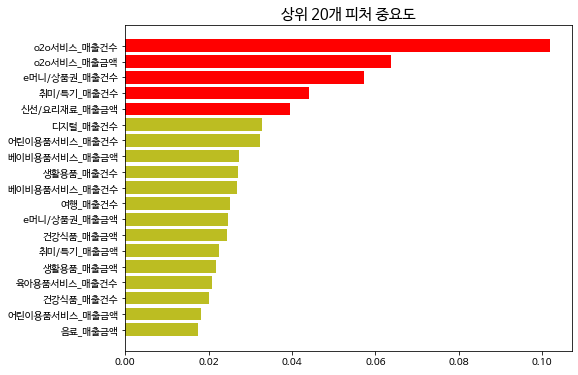

In [ ]:
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

### (3) 가구 형태 예측하기

In [ ]:
family=pd.read_csv("gagu.csv", encoding='cp949').drop(columns=['Unnamed: 0', '법정동'])
# family['가구생애주기']=family['가구생애주기'].replace({'1인가구':1,'신혼영유아가구':2, '초중고자녀가구':3,'성인자녀가구':4,'노인가구':5})
family['기준년월']=family['기준년월'].replace({201903:1,201909:2, 202003:3, 202009:4, 202103:5})
family=family.fillna(0)
family=family[family['가구생애주기']!='노인가구']
family=family.iloc[:,[0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103]]

Columns (34,35) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
X=family.iloc[:,4:]
y=family.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train_s, y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1인가구       0.64      0.68      0.66      1390
      성인자녀가구       0.51      0.50      0.51       855
     신혼영유아가구       0.51      0.58      0.54      1430
     초중고자녀가구       0.38      0.27      0.31       882

    accuracy                           0.54      4557
   macro avg       0.51      0.51      0.51      4557
weighted avg       0.53      0.54      0.53      4557



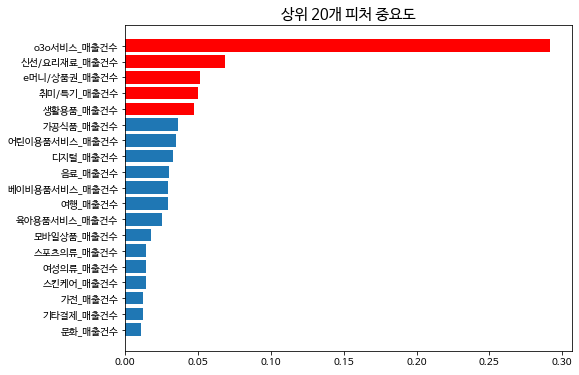

In [ ]:
##상위 20개 중요도
featureImportance = baseline.feature_importances_

importances_values = baseline.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

## **(B) XGBoost 방법**

### (1) 성별 예측하기

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

분류시작

RandomsearchCV를 통해 hyperparameter 추출

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [ ]:
clf = xgb.XGBClassifier()

param_grid = {
        'max_depth': [6, 9, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 1.5, 3.0, 7.0, 10.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 5,
              'eval_set': [(X_test_s, y_test)]}

hr_grid = RandomizedSearchCV(clf, param_grid, n_iter=100,
                            n_jobs=1, verbose=2, cv=5,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [ ]:
hr_grid.fit(X_train_s, y_train,**fit_params)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:09] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEv

[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=1.0, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:10] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estim

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:11] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:12] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:13] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:14] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subs

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:15] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:16] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:17] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=1.0, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:18] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:19] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:20] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_esti

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:21] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:22] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:23] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:24] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:25] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:26] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.8,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:27] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:28] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5 
[CV]  s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:29] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0.5, max_depth=20, learning_rate=0.01, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:30] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.8

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:31] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.8 
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:32] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subs

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:33] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:34] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:35] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estim

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:36] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsampl

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:37] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.9,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:38] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.1, colsample_bytree=1.0, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_esti

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:39] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.7, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:40] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:41] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0.5, max_depth=10, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:42] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:43] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=15, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:44] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:45] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:46] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:47] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:48] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:49] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:50] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:51] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.4 
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:52] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.7 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:53] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.5 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:54] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=20, learning_rate=0.001, colsample_bytree=0.7 
[CV]  subs

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:55] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsa

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:56] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.7, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:57] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.0, max_depth=10, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:58] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.2, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:20:59] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=20, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.2s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:00] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=15, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:01] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.5, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=20, learning_rate=0.01, colsample_bytree=0.9 
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:02] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.4 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.5, max_depth=6, learning_rate=0.2, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=10.0, max_depth=10, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsamp

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:03] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=0.5, n_es

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:04] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=0.5, max_depth=9, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:05] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3.0, max_depth=6, learning_rate=0.01, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:06] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.001, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:07] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.4 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=7.0, max_depth=6, learning_rate=0.001, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0.5, max_depth=15, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:08] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1.0, max_depth=9, learning_rate=0.1, colsample_bytree=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.4 
[CV]  subsample=0.8, n_est

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:09] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.8, n_estimators=100, min_child_weight=10.0, max_depth=15, learning_rate=0.1, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.001, colsample_bytree=0.9 
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:10] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9 
[CV]  subsample=1.0, n_estimators=100, min_child_weight=1.5, max_depth=10, learning_rate=0.001, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1.5, max_depth=9, learning_rate=0.2, colsample_bytree=0.7 
[CV]  subsamp

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [11:21:11] /workspace/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f3b9b1d1cb4]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMultiLogLoss>::CheckLabelError(int, unsigned long) const+0xcb) [0x7f3b9b3baedb]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::metric::EvalMClassBase<xgboost::metric::EvalMultiLogLoss>::Eval(xgboo

[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=10.0, max_depth=9, learning_rate=0.01, colsample_bytree=0.4 
[CV]  subsam

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.0min finished


,mean_test_score,params
0,NaN,"{'subsample': 0.5, 'n_estimators': 100, 'min_c..."
1,NaN,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
2,NaN,"{'subsample': 0.7, 'n_estimators': 100, 'min_c..."
3,NaN,"{'subsample': 0.7, 'n_estimators': 100, 'min_c..."
4,NaN,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
...,...,...
95,NaN,"{'subsample': 0.8, 'n_estimators': 100, 'min_c..."
96,NaN,"{'subsample': 0.6, 'n_estimators': 100, 'min_c..."
97,NaN,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."
98,NaN,"{'subsample': 0.6, 'n_estimators': 100, 'min_c..."


In [ ]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120188,0.001075,0.0,0.0,0.5,100,10,6,0.001,1,"{'subsample': 0.5, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.124158,0.004968,0.0,0.0,1,100,7,9,0.1,0.8,"{'subsample': 1.0, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
2,0.136939,0.005185,0.0,0.0,0.7,100,1,15,0.01,0.6,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
3,0.128509,0.007208,0.0,0.0,0.7,100,7,20,0.001,0.8,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
4,0.123552,0.008402,0.0,0.0,1,100,10,9,0.1,0.8,"{'subsample': 1.0, 'n_estimators': 100, 'min_c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,69


GridsearchCV를 통해 hyperparameter 추출

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [6, 9],
              'learning_rate': [0.001, 0.01, 0.1],
              'subsample': [0.5, 0.7, 1],
              'n_estimators': [100],
              'colsample_bytree': [0.6, 0.8, 1],
              'min_child_weight':[0.7, 1, 1.5, 7,10]}
              
fit_params={"early_stopping_rounds":5,'eval_set': [(X_test_s, y_test)] }
# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [ ]:
hr_grid.fit(X_train_s, y_train,**fit_params)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

[0]	validation_0-error:0.146341
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.138027


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.12694
[3]	validation_0-error:0.124169
[4]	validation_0-error:0.12306
[5]	validation_0-error:0.12306
[6]	validation_0-error:0.12306
[7]	validation_0-error:0.124723
[8]	validation_0-error:0.121397
[9]	validation_0-error:0.118071
[10]	validation_0-error:0.117517
[11]	validation_0-error:0.118071
[12]	validation_0-error:0.117517
[13]	validation_0-error:0.114745
[14]	validation_0-error:0.114745
[15]	validation_0-error:0.111419
[16]	validation_0-error:0.111419
[17]	validation_0-error:0.11031
[18]	validation_0-error:0.108647
[19]	validation_0-error:0.106984
[20]	validation_0-error:0.107539
[21]	validation_0-error:0.109756
[22]	validation_0-error:0.108647
[23]	validation_0-error:0.108093
[24]	validation_0-error:0.105876
[25]	validation_0-error:0.104213
[26]	validation_0-error:0.105876
[27]	validation_0-error:0.105322
[28]	validation_0-error:0.105876
[29]	validation_0-error:0.10643
[30]	validation_0-error:0.104767
Stopping. Best iteration:
[25]	validation_0-error:0.10421

,mean_test_score,params
0,0.961452,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
1,0.962900,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
2,0.963004,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
3,0.963144,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
4,0.962487,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
...,...,...
265,0.964563,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
266,0.963204,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
267,0.962312,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
268,0.966884,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."


In [ ]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
163,2.302542,0.460647,0.010021,0.001319,0.8,0.1,6,10,100,0.7,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.965343,0.976934,0.973685,0.972331,0.969028,0.971464,0.003975,1,0.980649,0.983450,0.980023,0.977572,0.980634,0.980466,0.001873
61,1.903027,0.510326,0.009459,0.001165,0.6,0.1,6,0.7,100,0.7,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.965016,0.976407,0.973947,0.972690,0.967646,0.971141,0.004189,2,0.983557,0.987425,0.984781,0.983114,0.982941,0.984364,0.001660
68,1.890068,0.540954,0.010098,0.002711,0.6,0.1,6,1.5,100,1,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.966850,0.974424,0.971447,0.970439,0.970873,0.970807,0.002420,3,0.984990,0.986648,0.981992,0.982113,0.987598,0.984668,0.002293
269,3.292736,0.539149,0.009065,0.001007,1,0.1,9,10,100,1,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.962628,0.973695,0.974609,0.972228,0.969472,0.970526,0.004315,4,0.982080,0.986668,0.985778,0.984953,0.987120,0.985320,0.001783
251,2.709195,0.392985,0.009119,0.000938,1,0.1,6,7,100,1,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.967407,0.972308,0.973837,0.970971,0.967062,0.970317,0.002678,5,0.984969,0.982968,0.981934,0.980008,0.981767,0.982329,0.001627


In [ ]:
xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       928
           1       0.88      0.92      0.90       876

    accuracy                           0.90      1804
   macro avg       0.90      0.90      0.90      1804
weighted avg       0.90      0.90      0.90      1804



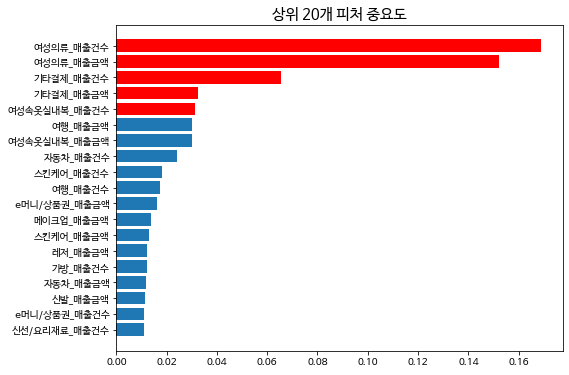

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

트리구조를 파악해서 각 노드들의 경계값을 파악해서 분석하고자 하는 대상의 피처를 구분짓는 임계점을 알아 낼 수 있다.

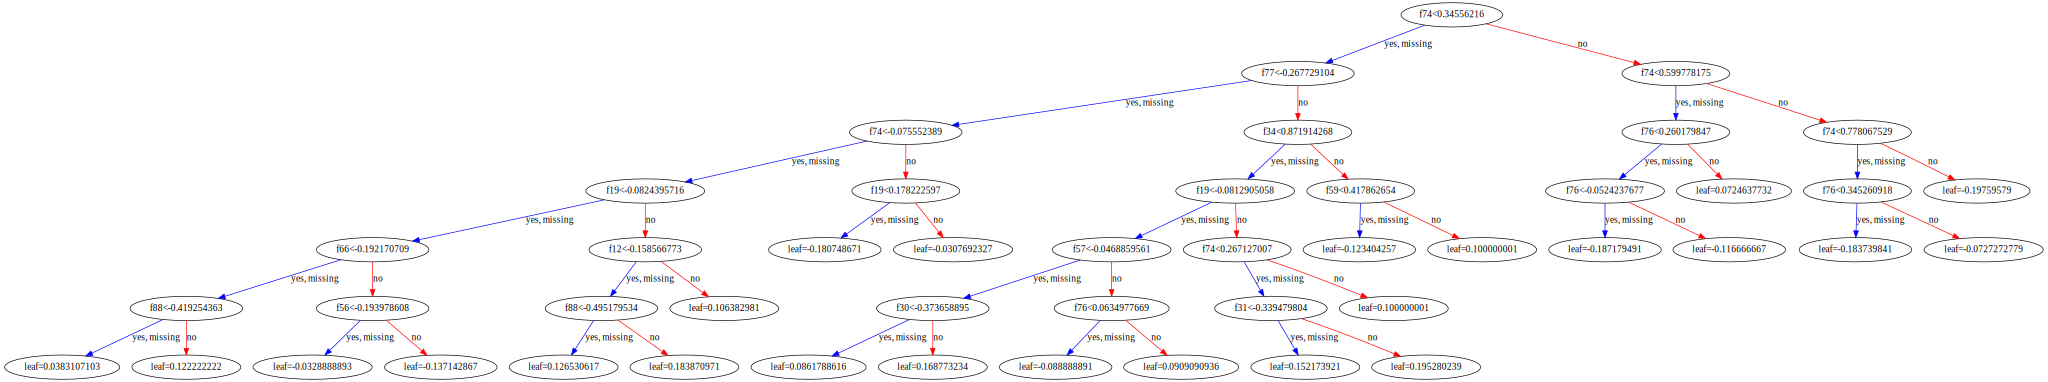

In [ ]:
##첫번째 트리구조
import graphviz
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

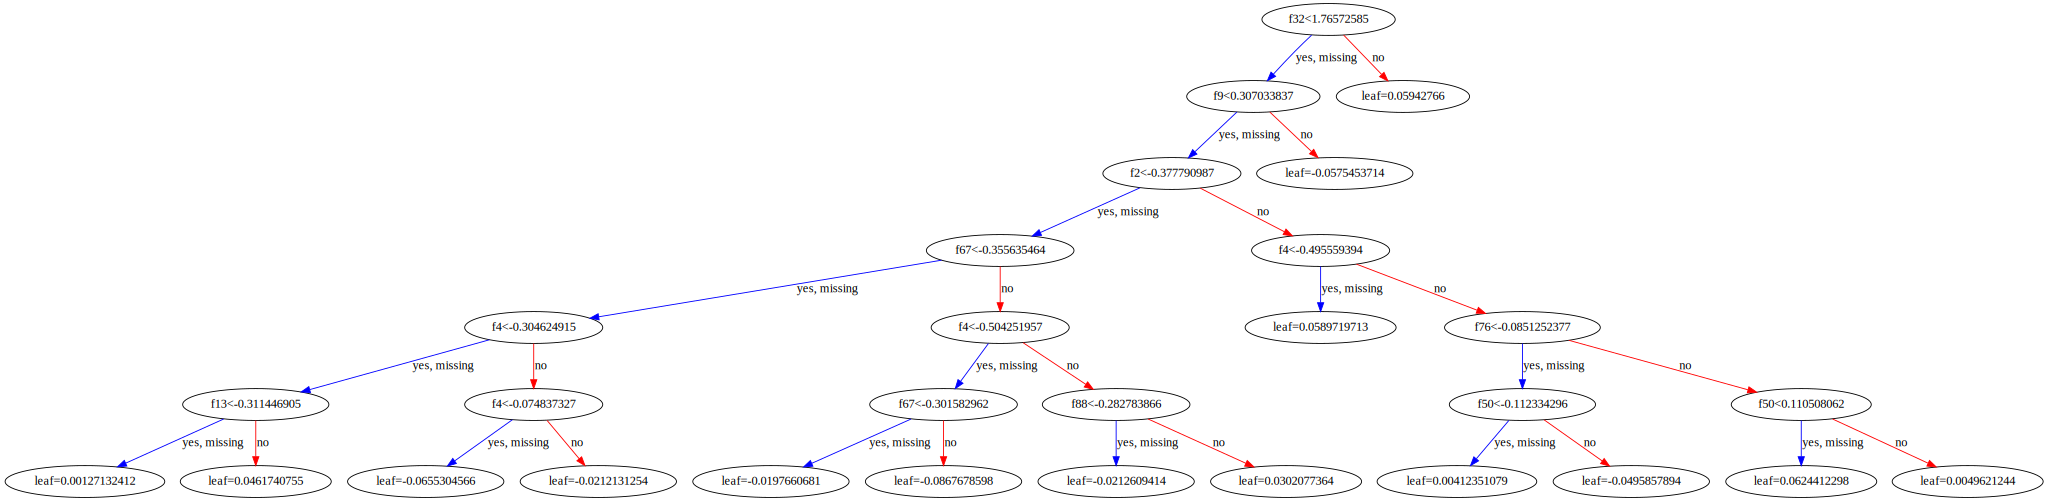

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

상위 5개만 추출하여 진행

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df[['여성의류_매출건수', '기타결제_매출건수','여성속옷실내복_매출건수','자동차_매출건수','여행_매출건수']]
y = df.iloc[:,[1]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       928
           1       0.88      0.92      0.90       876

    accuracy                           0.90      1804
   macro avg       0.90      0.90      0.90      1804
weighted avg       0.90      0.90      0.90      1804



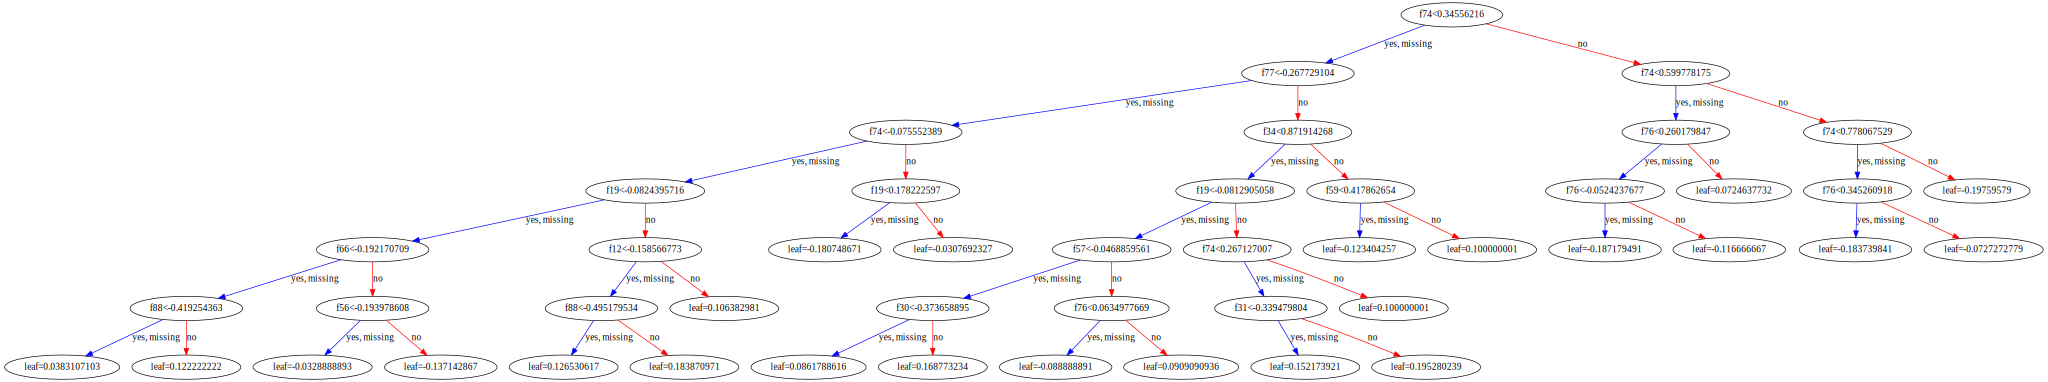

In [ ]:
import graphviz
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

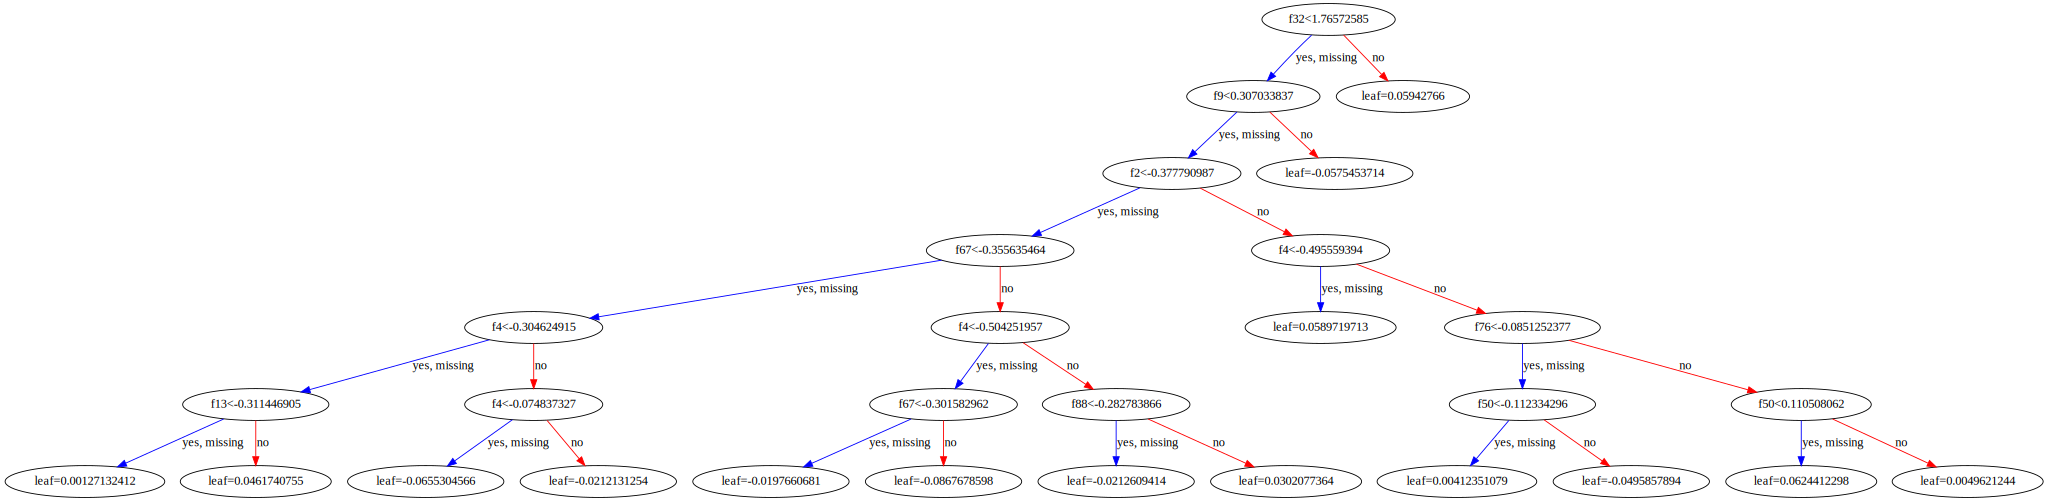

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

### (2) 연령 예측하기

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df.iloc[:,3:103]
y = df.iloc[:,[2]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Featrue Scailing을 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

분류시작

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

          20       0.91      0.94      0.93       382
          30       0.88      0.81      0.84       365
          40       0.80      0.82      0.81       357
          50       0.80      0.82      0.81       363
          60       0.86      0.87      0.86       337

    accuracy                           0.85      1804
   macro avg       0.85      0.85      0.85      1804
weighted avg       0.85      0.85      0.85      1804



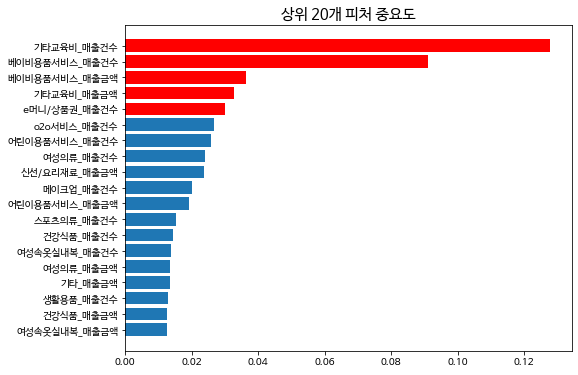

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

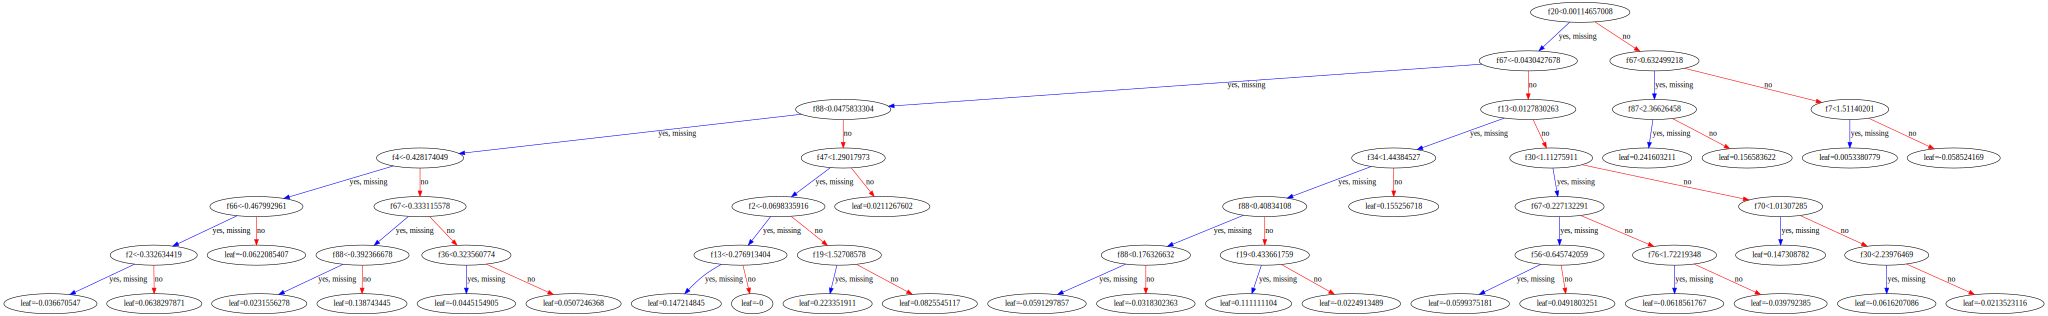

In [ ]:
##첫번째 트리구조
import graphviz
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

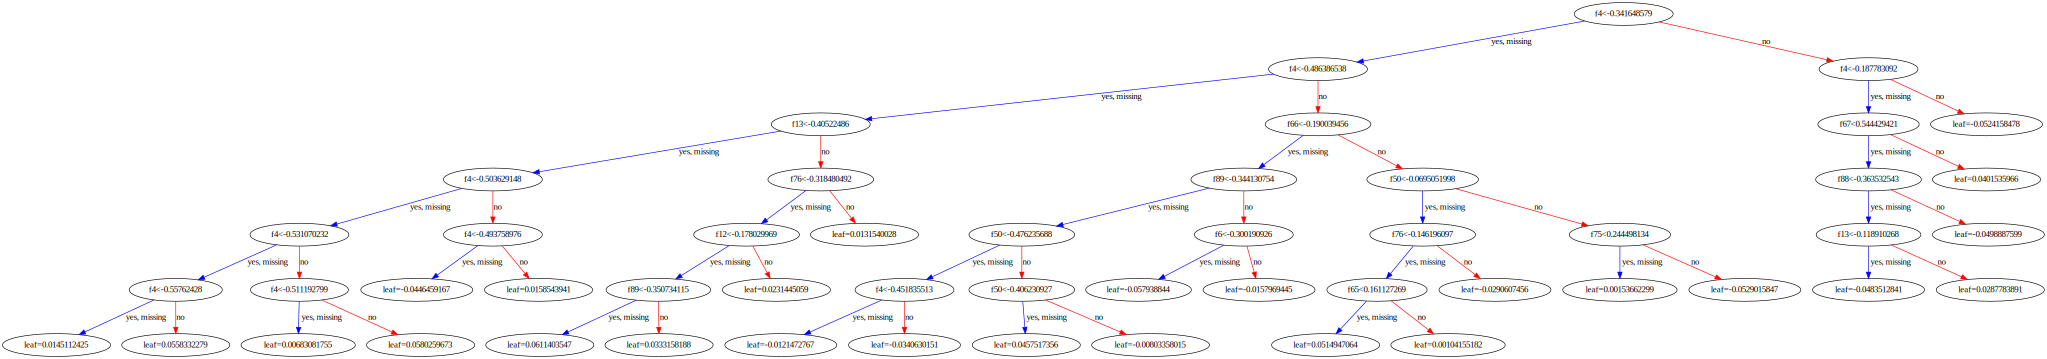

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

상위 5개만 추출하여 진행

In [ ]:
df= pd.read_csv("refined_Join_per person.csv").drop(columns=['Unnamed: 0','n','법정동코드','인구수'])

X = df[['기타교육비_매출건수', '베이비용품서비스_매출건수',' e머니/상품권_매출건수','o2o서비스_매출건수','어린이용품서비스_매출건수']]
y = df.iloc[:,[2]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(max_depth=6, n_estimators=100, colsample_bytree=0.8, learning_rate=0.1,subsample=0.7,min_child_weight=10) 
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

          20       0.91      0.94      0.93       382
          30       0.88      0.81      0.84       365
          40       0.80      0.82      0.81       357
          50       0.80      0.82      0.81       363
          60       0.86      0.87      0.86       337

    accuracy                           0.85      1804
   macro avg       0.85      0.85      0.85      1804
weighted avg       0.85      0.85      0.85      1804



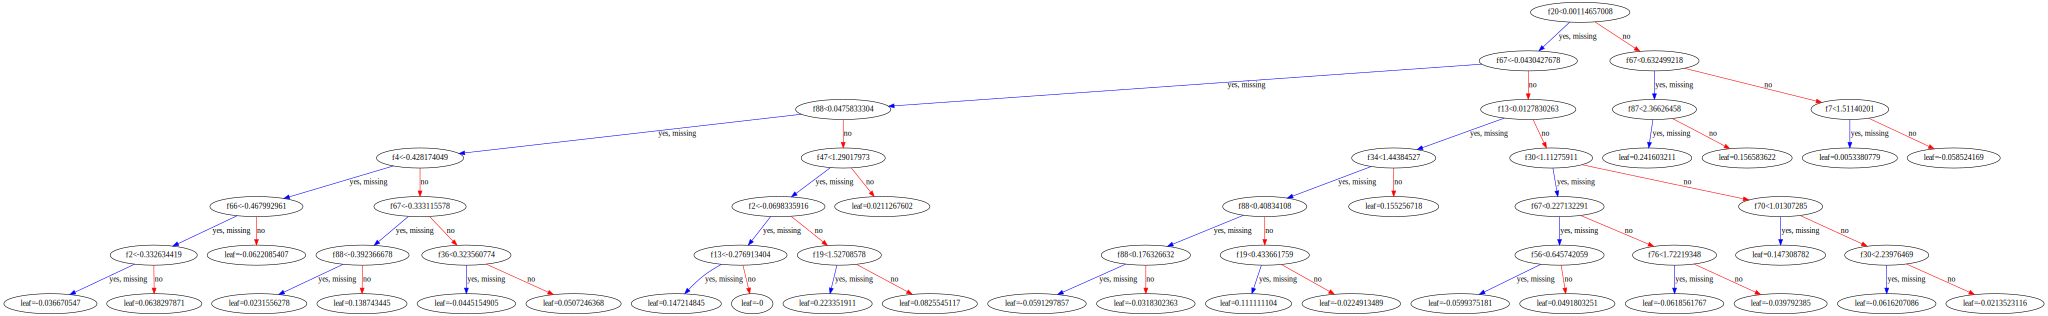

In [ ]:
import graphviz
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

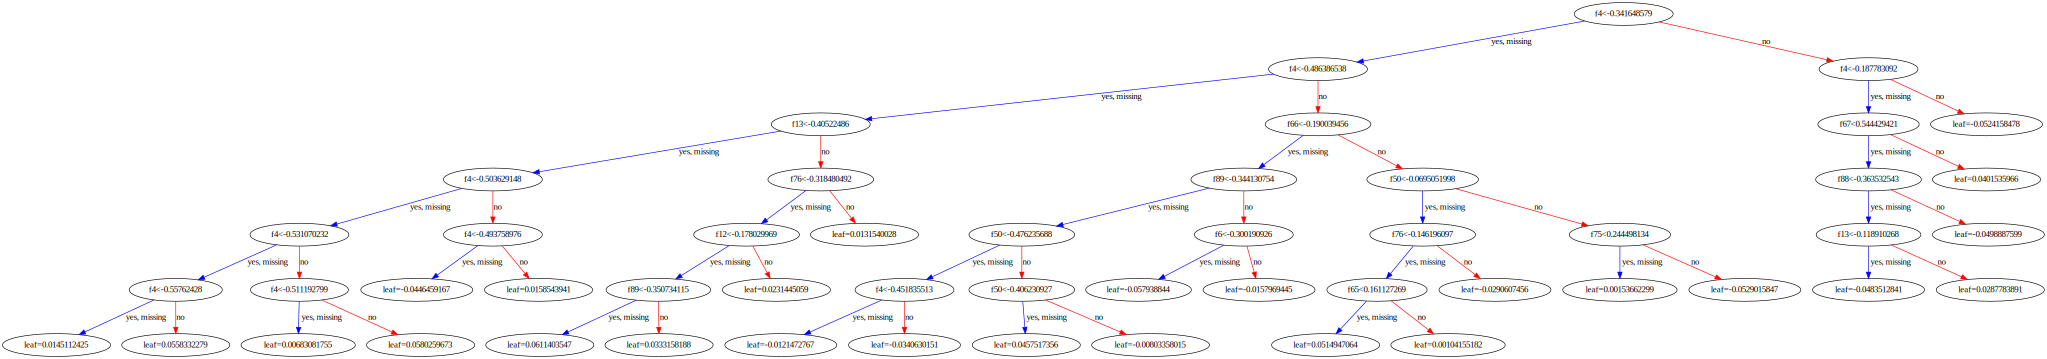

In [ ]:
##마지막 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=99)
graph = graphviz.Source(dot_data)
graph

### (3) 가구형태 예측하기

매출건수만 따로 추출해서 분석

In [ ]:
family=pd.read_csv("gagu.csv", encoding='cp949').drop(columns=['Unnamed: 0', '법정동'])
# family['가구생애주기']=family['가구생애주기'].replace({'1인가구':1,'신혼영유아가구':2, '초중고자녀가구':3,'성인자녀가구':4,'노인가구':5})
family['기준년월']=family['기준년월'].replace({201903:1,201909:2, 202003:3, 202009:4, 202103:5})
family=family.fillna(0)
# family=family[family['가구생애주기']!='노인가구']
family=family.iloc[:,[0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# family[family['가구생애주기']=='노인가구']

In [ ]:
# for i in range(3,53):
#   print(2*(i)-1,end=',')

In [ ]:
X=family.iloc[:,4:]
y=family.iloc[:,[3]]

In [ ]:
X

,DIY자재/용품_매출건수,e머니/상품권_매출건수,o3o서비스_매출건수,가공식품_매출건수,가방_매출건수,가전_매출건수,건강식품_매출건수,기부/후원_매출건수,기타_매출건수,기타결제_매출건수,기타교육비_매출건수,남성뷰티_매출건수,남성속옷실내복_매출건수,남성의류_매출건수,다이어트_매출건수,디지털_매출건수,레저_매출건수,메이크업_매출건수,모바일상품_매출건수,문화_매출건수,미성년자이용불가_매출건수,바디케어_매출건수,반려동물_매출건수,베이비용품서비스_매출건수,뷰티소품_매출건수,생활용품_매출건수,소파/의자_매출건수,수납가구_매출건수,스킨케어_매출건수,스포츠_매출건수,스포츠의류_매출건수,시계/주얼리_매출건수,신발_매출건수,신선/요리재료_매출건수,양말_매출건수,어린이용품서비스_매출건수,여성속옷실내복_매출건수,여성의류_매출건수,여행_매출건수,육아용품서비스_매출건수,음료_매출건수,인테리어소품_매출건수,임산부용품서비스_매출건수,자동차_매출건수,취미/특기_매출건수,침구/수예_매출건수,침대_매출건수,테이블가구_매출건수,패션소품_매출건수,향수_매출건수
0,0.0,702060.0,13618251.0,318720.0,0.0,0.0,862057.0,0,0.0,266816.0,0.0,0.0,0.0,1347488.0,0,5798971.0,0.0,0.0,269317.0,118946.0,0.0,236065.0,0.0,0.0,0.0,444065.0,0.0,0.0,0.0,0.0,1182245.0,0.0,1381231.0,0.0,0.0,0.0,0.0,0.0,2616631.0,0.0,0.0,0.0,0.0,0.0,4756975.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,864484.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2134445.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3647166.0,0.0,0.0,0.0,0.0,0.0,1113707.0,0.0,0.0,0.0,0.0,0.0
3,1080521.0,3600015.0,57461456.0,9026481.0,0.0,39755142.0,4135460.0,0,567484.0,1015110.0,0.0,0.0,0.0,957182.0,0,16190891.0,430116.0,0.0,839637.0,6288520.0,0.0,1791965.0,383911.0,5574057.0,574676.0,12759566.0,0.0,3045584.0,1711604.0,2802093.0,2763463.0,0.0,1412374.0,7342034.0,732485.0,6724043.0,0.0,830798.0,11179620.0,5987547.0,2626345.0,1594809.0,668324.0,471401.0,8605045.0,3075242.0,6226610.0,4203398.0,5478900.0,0.0
4,0.0,0.0,12170741.0,639274.0,0.0,2713602.0,1555704.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2426229.0,0.0,0.0,0.0,0.0,0.0,809566.0,901630.0,0.0,0.0,1184021.0,0.0,14068291.0,719269.0,0.0,0.0,0.0,0.0,2127437.0,0.0,483020.0,0.0,0.0,3178029.0,1087067.0,834467.0,0.0,0.0,0.0,5946787.0,1074476.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,0.0,0.0,1863012.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,424940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171639.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24799,0.0,299624.0,6147091.0,657255.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,853583.0,0.0,0.0,0.0,1663610.0,0.0,0.0,0.0,0.0,0.0,569953.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1479444.0,0.0,0.0,0.0,0.0,0.0,821315.0,329255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24800,0.0,396113.0,2912284.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530084.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,901644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24801,0.0,105391.0,5057754.0,353441.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,418806.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564135.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

GridsearchCV를 통해 hyperparameter 추출

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [6, 9],
              'learning_rate': [0.001, 0.01, 0.1],
              'subsample': [0.5, 0.7, 1],
              'n_estimators': [100],
              'colsample_bytree': [0.6, 0.8, 1],
              'min_child_weight':[0.7, 1, 1.5, 7,10]}
              
fit_params={"early_stopping_rounds":3,'eval_set': [(X_test_s, y_test)] }
# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='f1_macro',
                       n_jobs=-1,
                       cv=3,
                       refit=True, 
                       return_train_score=True)

In [ ]:
hr_grid.fit(X_train_s, y_train,**fit_params)
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-merror:0.52308
Will train until validation_0-merror hasn't improved in 3 rounds.
[1]	validation_0-merror:0.495666
[2]	validation_0-merror:0.489821
[3]	validation_0-merror:0.488813
[4]	validation_0-merror:0.484983
[5]	validation_0-merror:0.482967
[6]	validation_0-merror:0.482564
[7]	validation_0-merror:0.476718
[8]	validation_0-merror:0.479742
[9]	validation_0-merror:0.478129
[10]	validation_0-merror:0.478533
Stopping. Best iteration:
[7]	validation_0-merror:0.476718



,mean_test_score,params
0,0.418365,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
1,0.419195,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
2,0.419684,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
3,0.420289,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
4,0.418606,"{'colsample_bytree': 0.6, 'learning_rate': 0.0..."
...,...,...
265,0.451992,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
266,0.451202,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
267,0.449363,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."
268,0.455693,"{'colsample_bytree': 1, 'learning_rate': 0.1, ..."


In [ ]:
hr_grid_df.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
264,12.921902,1.563507,0.176067,0.009391,1,0.1,9,7,100,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.471870,0.448774,0.463153,0.461266,0.009523,1,0.593028,0.583284,0.580072,0.585461,0.005509
258,13.160712,2.591728,0.168881,0.016930,1,0.1,9,1,100,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.470119,0.459704,0.453145,0.460989,0.006989,2,0.654592,0.672109,0.636892,0.654531,0.014377
255,15.217635,2.835536,0.179022,0.012617,1,0.1,9,0.7,100,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.474381,0.457651,0.447525,0.459852,0.011074,3,0.686495,0.672004,0.659879,0.672793,0.010880
250,13.353433,1.146534,0.173347,0.014799,1,0.1,6,7,100,0.7,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.468197,0.452647,0.457884,0.459576,0.006460,4,0.554053,0.549574,0.544442,0.549356,0.003926
175,11.937641,1.718416,0.172698,0.011446,0.8,0.1,9,7,100,0.7,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.465873,0.456850,0.454879,0.459201,0.004786,5,0.632549,0.608995,0.623481,0.621675,0.009700


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgbc=XGBClassifier(max_depth=9, n_estimators=100, colsample_bytree=1, learning_rate=0.1,subsample=0.5, min_child_weight=10)
xgbc.fit(X_train_s,y_train.to_numpy().ravel())
prediction_xgb = xgbc.predict(X_test_s)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

        1인가구       0.62      0.73      0.67      1394
        노인가구       0.49      0.32      0.38       414
      성인자녀가구       0.52      0.46      0.48       841
     신혼영유아가구       0.51      0.65      0.57      1452
     초중고자녀가구       0.52      0.27      0.35       860

    accuracy                           0.55      4961
   macro avg       0.53      0.48      0.49      4961
weighted avg       0.54      0.55      0.53      4961



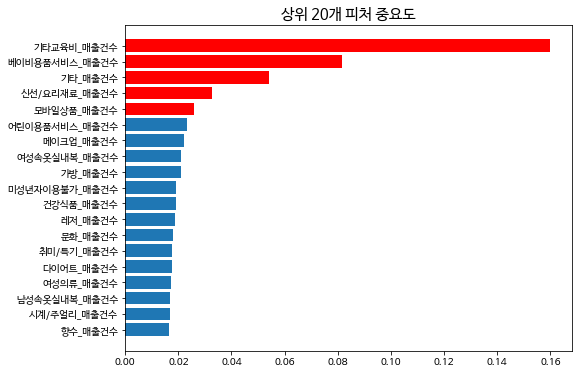

In [ ]:
##상위 20개 중요도
featureImportance = xgbc.feature_importances_
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

importances_values = xgbc.feature_importances_
importances = pd.Series(importances_values, index=X.columns)
top20 = importances.sort_values(ascending=False)[:20]
top5=top20[:5].sort_values(ascending=True)
top15to=top20[6:20].sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.title('상위 20개 피처 중요도',fontdict={'fontsize':15})
plt.barh(width = top15to, y = top15to.index, color='tab:blue')
plt.barh(width = top5, y= top5.index, color='red')
plt.show()

PCA진행하여 가구형태를 예측하는데 중요하게 작용하는 구매품목 추출

In [ ]:
family=pd.read_csv("gagu.csv", encoding='cp949').drop(columns=['Unnamed: 0', '법정동'])
# family['가구생애주기']=family['가구생애주기'].replace({'1인가구':1,'신혼영유아가구':2, '초중고자녀가구':3,'성인자녀가구':4,'노인가구':5})
family['기준년월']=family['기준년월'].replace({201903:1,201909:2, 202003:3, 202009:4, 202103:5})
family=family.fillna(0)
# family=family[family['가구생애주기']!=5]
family=family.iloc[:,[0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
X=family.iloc[:,4:]
y=family.iloc[:,[3]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

xgbc=XGBClassifier(max_depth=9, n_estimators=100, colsample_bytree=1, learning_rate=0.1, subsample=0.5, min_child_weight=10)
xgbc.fit(X_train_s,y_train)

selector =RFE(xgbc, n_features_to_select=10)
selector = selector.fit(X_test_s, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
selector.support_  

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [ ]:
##피처들의 순위
selector.ranking_

array([30, 20, 37, 32,  2, 15, 21, 38,  1, 18,  1, 39,  1, 10,  1, 31,  1,
        5,  7,  4, 40, 26,  6,  1,  1, 35, 36, 34, 16, 14, 17,  1, 23, 11,
        3,  8,  1, 13, 33, 19, 29, 25, 24, 27, 22, 12, 41, 28,  9,  1])

In [ ]:
###PCA이후에 중요 피처 열이름 추출
i=0
coln=[]
for i in range(0,49):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [ ]:
coln

['기타_매출건수',
 '기타교육비_매출건수',
 '남성속옷실내복_매출건수',
 '다이어트_매출건수',
 '레저_매출건수',
 '베이비용품서비스_매출건수',
 '뷰티소품_매출건수',
 '시계/주얼리_매출건수',
 '여성속옷실내복_매출건수']

# 4. 머신러닝 회귀 모형
      1. 특정품목 ~~ 다른 품목들간의 관계 우선 3가지 정도 분석해보기
      2. 여행~~ 금융자산정보
      3. 여가~~ 금융자산정보


### (1) 특정 품목과 관련있는 구매패턴 분석 >> 수용파트

### (2). 여행매출건수~ 금융자산정보 회귀 분석

In [ ]:
df= pd.read_csv("refined_data.csv").drop(columns=["Unnamed: 0","n", '법정동'])
df

,기준년월,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출건수,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,1,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,0,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0
1,1,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,...,0,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0
2,1,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,...,0,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0
3,1,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,...,0,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0
4,1,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0
14468,5,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,0,...,5,334677,0,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0
14469,5,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,0,...,0,0,0,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0
14470,5,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0


In [ ]:
X=df.iloc[:,103:]
y=df['여행_매출건수']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

**PCA를 통해 여행매출에 주요하게 영향을 미치는 금융자산 요소 3가지 추출**

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

rg=XGBRegressor()
rg.fit(X_train_s,y_train)

selector =RFE(rg, n_features_to_select=3)
selector = selector.fit(X_test_s, y_test)

[02:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
selector.support_ 

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False])

In [ ]:
##피처들의 순위
selector.ranking_

array([ 1, 10,  1,  1,  5,  2,  3,  8,  7,  6,  9,  4])

In [ ]:
###PCA이후에 중요 피처 열이름 추출
i=0
coln=[]
for i in range(0,12):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [ ]:
coln

['급여입금', '연금입금', '총소비금액']

**추출한 요소들을 가지고 회귀 분석**

In [ ]:
X=df[['급여입금','연금입금','총소비금액']]
y=df['여행_매출건수']

여러 회귀 모델을 준비

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

1.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

lm=RandomForestRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 19.060907153997878
MSE: 1312.256603177608
RMSE: 36.225082514434774
R^2: 0.618


2.XGBRegressor

In [ ]:
from xgboost import XGBRegressor
lm = XGBRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

[02:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#XGBoost 성능
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 17.97264558586432
MSE: 1189.4601615454576
RMSE: 34.488551166227
R^2: 0.654


In [ ]:
import shap
# compute SHAP values
explainer = shap.Explainer(lm, X_test_s)
shap_values = explainer(X_test_s)

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


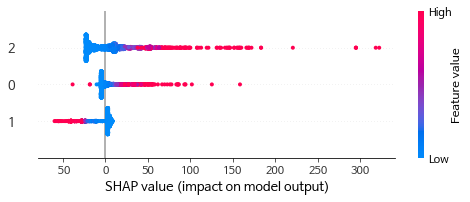

In [ ]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

3. LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
print(lm.intercept_) 
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

19.29423541807038
        Coefficient
급여입금   7.844038e-01
연금입금  -4.919634e-07
총소비금액  1.041274e+01


In [ ]:
predictions = lm.predict(X_test_s)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 25.06022114258578
MSE: 1639.4893889036011
RMSE: 40.490608650693325
R^2: 0.522


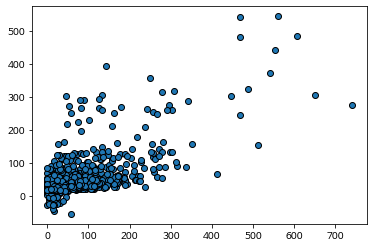

In [ ]:
predictions = lm.predict(X_test_s)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')

### (3). 취미_매출건수~ 금융자산정보 회귀 분석

In [ ]:
df= pd.read_csv("refined_data.csv").drop(columns=["Unnamed: 0","n", '법정동'])
df

,기준년월,성별,연령,DIY자재/용품_매출건수,DIY자재/용품_매출금액,e머니/상품권_매출건수,e머니/상품권_매출금액,o2o서비스_매출건수,o2o서비스_매출금액,가공식품_매출건수,가공식품_매출금액,가방_매출건수,가방_매출금액,가전_매출건수,가전_매출금액,건강식품_매출건수,건강식품_매출금액,기부/후원_매출건수,기부/후원_매출금액,기타_매출건수,기타_매출금액,기타결제_매출건수,기타결제_매출금액,기타교육비_매출건수,기타교육비_매출금액,남성뷰티_매출건수,남성뷰티_매출금액,남성속옷실내복_매출건수,남성속옷실내복_매출금액,남성의류_매출건수,남성의류_매출금액,다이어트_매출건수,다이어트_매출금액,디지털_매출건수,디지털_매출금액,레저_매출건수,레저_매출금액,메이크업_매출건수,메이크업_매출금액,모바일상품_매출건수,...,여성속옷실내복_매출건수,여성속옷실내복_매출금액,여성의류_매출건수,여성의류_매출금액,여행_매출건수,여행_매출금액,육아용품서비스_매출건수,육아용품서비스_매출금액,음료_매출건수,음료_매출금액,인테리어소품_매출건수,인테리어소품_매출금액,임산부용품서비스_매출건수,임산부용품서비스_매출금액,자동차_매출건수,자동차_매출금액,취미/특기_매출건수,취미/특기_매출금액,침구/수예_매출건수,침구/수예_매출금액,침대_매출건수,침대_매출금액,테이블가구_매출건수,테이블가구_매출금액,패션소품_매출건수,패션소품_매출금액,향수_매출건수,향수_매출금액,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,1,1,20,0,0,104,702060.0,421,14482735,25,318720,0,0,0,0,42,862057,0,0.0,0,0,17,266816,0,0,0,0,0,0,25,1347488,0,0,67,5798971,0,0,0,0,13,...,0,0,0,0,75,2616631.0,0,0,0,0,0,0,0,0,0,0,104,4756975,0,0.0,0,0,0,0,0,0,0,0,6053415,0,0.0,276282702,637634013,9.622906e+08,0.0,0,0.0,0.000000e+00,0,0.0
1,1,1,30,21,1080521,196,3600015.0,1668,59595901,108,9026481,0,0,100,39755142,117,4135460,0,0.0,25,567484,42,1015110,0,0,0,0,0,0,21,957182,0,0,179,16190891,17,430116,0,0,38,...,0,0,25,830798,191,14826786.0,217,5987547,83,2626345,25,1594809,17,668324,29,471401,125,9718752,46,3075242.0,13,6226610,33,4203398,42,5478900,0,0,180731220,0,0.0,542263647,1733864271,1.801342e+09,27558987.0,0,412696176.0,2.196871e+09,0,0.0
2,1,1,40,21,697386,104,4246085.0,867,38478365,121,4147988,0,0,67,5106545,162,32823629,0,0.0,25,847366,63,506408,0,0,0,0,0,0,29,1517266,0,0,158,6323198,21,1207176,0,0,38,...,0,0,33,949035,105,9799656.0,87,2745620,96,3029070,25,4572509,21,576698,17,315802,84,12363378,63,2511968.0,0,0,0,0,29,1282589,0,0,122834583,0,0.0,499549200,1690930581,7.602494e+08,396429036.0,41064933,586295709.0,1.179034e+09,1469238294,0.0
3,1,1,50,17,2773427,58,2648983.0,221,10348725,29,2016253,0,0,25,5518572,38,3209088,0,0.0,0,0,442,2767466,0,0,0,0,0,0,17,968584,0,0,54,11018000,13,682882,0,0,0,...,0,0,0,0,29,3236812.0,25,359368,38,926352,0,0,0,0,0,0,92,6889960,17,1045485.0,0,0,0,0,0,0,0,0,60371844,6961017,0.0,546344004,1582574676,5.228890e+08,807396303.0,34321524,261313674.0,2.075667e+09,724597086,0.0
4,1,1,60,0,0,0,0.0,29,1317362,0,0,0,0,0,0,0,0,0,0.0,0,0,142,115481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,46,10488912,0,0.0,0,0,0,0,0,0,0,0,9518316,13826772,65234532.0,586165779,2645038200,9.619000e+08,791406597.0,0,299537916.0,1.366055e+09,627738162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,5,1,50,0,0,0,0.0,0,0,0,0,0,0,0,0,5,157459,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,7565973,21540136,1.691960e+07,0.0,0,0.0,0.000000e+00,0,0.0
14468,5,0,20,0,0,19,363764.0,179,5707264,14,269817,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,266084,0,0,0,0,0,...,5,334677,0,0,12,1026043.0,0,0,0,0,0,0,0,0,0,0,0,0,7,289857.0,0,0,0,0,5,432260,0,0,0,0,0.0,8887386,14462496,1.505395e+07,0.0,0,0.0,0.000000e+00,0,0.0
14469,5,0,30,0,0,10,299624.0,201,8010103,17,657255,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1278523,0,0,0,0,0,...,0,0,0,0,0,0.0,9,821315,9,329255,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,6467308,0,0.0,15377193,63203897,4.582949e+07,0.0,0,0.0,0.000000e+00,0,0.0
14470,5,0,40,0,0,27,501504.0,120,7970038,12,353441,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,564135,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,9113575,29198407,1.760240e+07,4008189.0,1058035,17024229.0,1.328604e+08,0,0.0


In [ ]:
X=df.iloc[:,103:]
y=df['취미/특기_매출건수']

In [ ]:
y

0        104
1        125
2         84
3         92
4         46
        ... 
14467      0
14468      0
14469      0
14470     10
14471      0
Name: 취미/특기_매출건수, Length: 14472, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

**PCA를 통해 취미/특기 매출액에 영향을 미치는 3가지 중요 금융자산 정보를 추출**

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

rg=XGBRegressor()
rg.fit(X_train_s,y_train)

selector =RFE(rg, n_features_to_select=3)
selector = selector.fit(X_test_s, y_test)

[02:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
selector.support_ 

array([False, False,  True,  True, False, False,  True, False, False,
       False, False, False])

In [ ]:
##피처들의 순위
selector.ranking_

array([ 3, 10,  1,  1,  7,  2,  1,  9,  8,  6,  5,  4])

In [ ]:
###PCA이후에 중요 피처 열이름 추출
i=0
coln=[]
for i in range(0,12):
  if selector.support_[i]==True:
    a=X.iloc[[0],[i]].any(axis=0).index.values
    i+=1
    coln.append(a[0])
  else:
    i+=1

In [ ]:
coln

['연금입금', '총소비금액', '신탁금액']

**추출한 요소들을 바탕으로 회귀 분석 진행**

In [ ]:
X=df[['연금입금', '총소비금액', '신탁금액']]
y=df['취미/특기_매출건수']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

X_train_s=pd.DataFrame(X_train_s)
X_test_s=pd.DataFrame(X_test_s)

여러 회귀 모델을 준비

1.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

lm=RandomForestRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 32.78648927479409
MSE: 3896.459493407085
RMSE: 62.42162680839939
R^2: 0.595


2.XGBoostRegressor

In [ ]:
from xgboost import XGBRegressor
lm = XGBRegressor()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

[02:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 30.528188592885236
MSE: 3251.1775698566917
RMSE: 57.01909829045608
R^2: 0.662


In [ ]:
import shap
# compute SHAP values
explainer = shap.Explainer(lm, X_test_s)
shap_values = explainer(X_test_s)

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


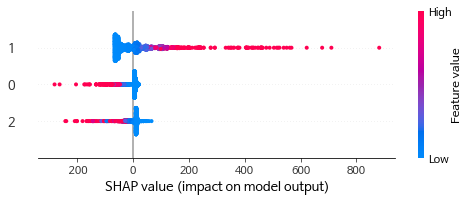

In [ ]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

3.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_s, y_train)
predictions = lm.predict(X_test_s)

In [ ]:
print('Intercept : ',lm.intercept_) 
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])  
print(coeff_df)

Intercept :  35.56089602980163
       Coefficient
연금입금     -0.000001
총소비금액    23.302432
신탁금액     -0.337743


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions)))

MAE: 43.57448459288183
MSE: 4823.157603163453
RMSE: 69.44895681839616
R^2: 0.498


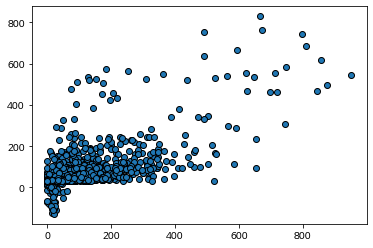

In [ ]:
predictions = lm.predict(X_test_s)
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, edgecolor='black')